# Sessionization by both IP Address and SendID

,SessionID,SessionDate,SessionDuration,RequestCount,CompanyCount,UserAgentCount,OpenCount,ClickCount,UniqueLinkCount
0,{6F169C66-94B7-8377-D30F-824585B62F30},2019-07-15 12:42:31.650000000,0,1,1,1,1,0,1
1,{5F1C5E02-7442-1BAE-3101-F818CE412CBF},2019-07-15 12:06:16.033000000,0,1,1,1,1,0,1
2,{816F4904-626D-E620-7AF3-A06495C19DD8},2019-07-15 12:02:28.580000000,0,1,1,1,1,0,1
3,{3B8153C7-100B-3359-ABB3-E4012EAEE328},2019-07-15 12:37:00.540000000,0,1,1,1,1,0,1
4,{4E11403D-EAF1-50E5-AC31-D0950DC8E6DA},2019-07-15 12:58:02.370000000,0,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1241616,{A9159C2F-A8B6-5A5F-C1E7-ECF5A08B25FB},2019-07-15 12:29:56.493000000,0,1,1,1,1,0,1
1241617,{9BC2A29F-1883-0599-4A49-331DEE24648D},2019-07-15 12:56:54.630000000,0,1,1,1,1,0,1
1241618,{5EA1144E-703D-1A6A-12A1-CB0772538C80},2019-07-15 12:05:35.213000000,0,1,1,1,1,0,1
1241619,{4ACFD521-80F9-DEF1-3EF5-FD0F910DCAEA},2019-07-15 12:02:04.007000000,0,1,1,1,1,0,1


SessionID          object
SessionDate        object
SessionDuration     int64
RequestCount        int64
CompanyCount        int64
UserAgentCount      int64
OpenCount           int64
ClickCount          int64
UniqueLinkCount     int64
dtype: object


<Figure size 432x288 with 0 Axes>

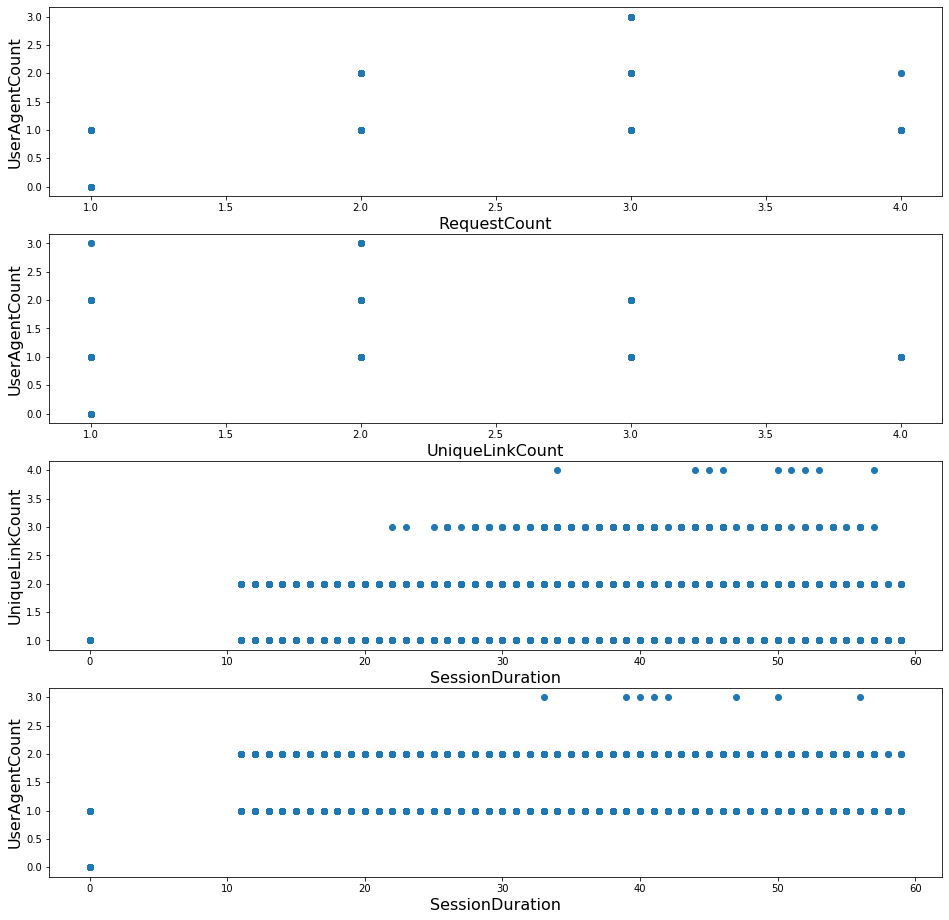

<Figure size 432x288 with 0 Axes>

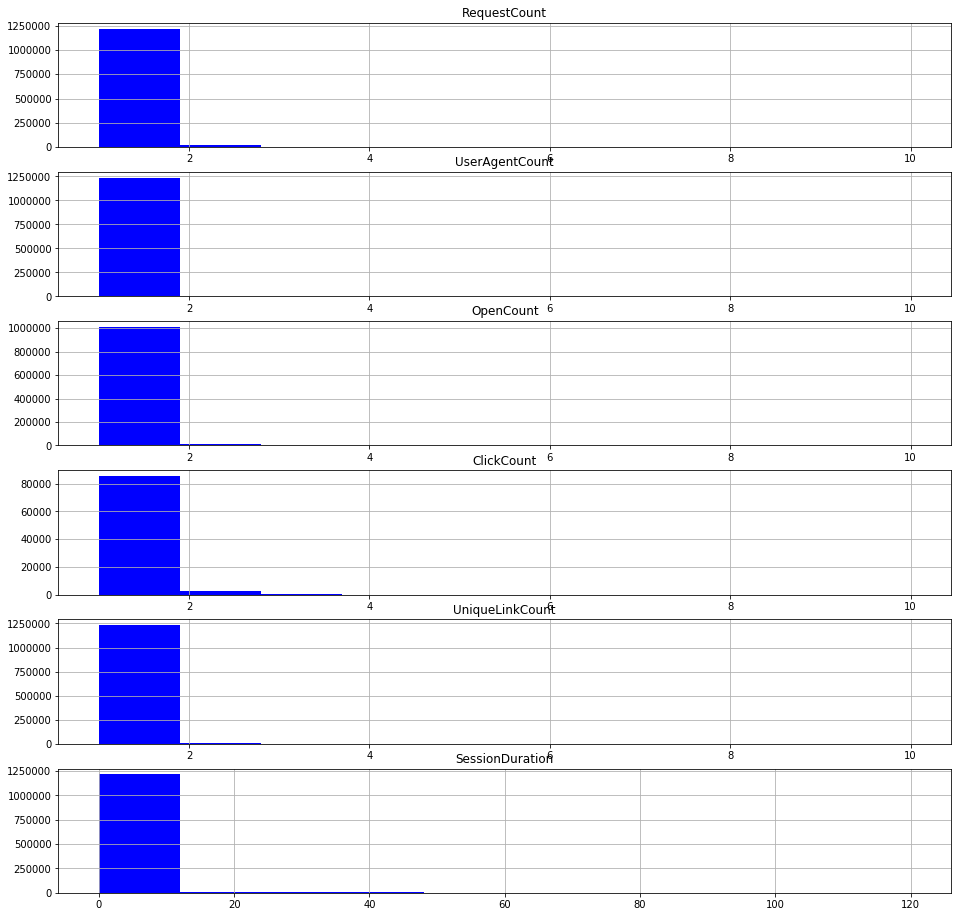

,SessionDuration,RequestCount,CompanyCount,UserAgentCount,OpenCount,ClickCount,UniqueLinkCount
SessionDuration,1,0.926853,nan,0.565872,0.137547,0.262574,0.63408
RequestCount,0.926853,1,nan,0.571793,0.146546,0.266022,0.64592
CompanyCount,nan,nan,nan,nan,nan,nan,nan
UserAgentCount,0.565872,0.571793,nan,1,0.0417574,0.285835,0.857992
OpenCount,0.137547,0.146546,nan,0.0417574,1,-0.494689,0.000995946
ClickCount,0.262574,0.266022,nan,0.285835,-0.494689,1,0.389564
UniqueLinkCount,0.63408,0.64592,nan,0.857992,0.000995946,0.389564,1


In [20]:

import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt  
import matplotlib.cm as cm
from IPython.display import display

%matplotlib inline

df = pd.read_csv("C:/Users/youci/Documents/EmailTrackingSessions_IPandSendID.csv")

# Show dataframe
pd.options.display.max_columns = None
display(df) # show raw data
print(df.dtypes)

# Filter out outliers
df = df[df["RequestCount"] < 500]

# Show a few scatter
def SetScatterSubPlot(ax, X,Y):
    ax.set_xlabel(X, fontsize=16)
    ax.set_ylabel(Y, fontsize=16)
    ax.scatter(df[X], df[Y])

plt.clf()
fig, ax = plt.subplots(nrows=4, ncols=1, figsize = (16,16))    
SetScatterSubPlot(ax[0], "RequestCount", "UserAgentCount")
SetScatterSubPlot(ax[1], "UniqueLinkCount", "UserAgentCount")
SetScatterSubPlot(ax[2], "SessionDuration", "UniqueLinkCount")
SetScatterSubPlot(ax[3], "SessionDuration", "UserAgentCount")
plt.show()

# Histos
def SetHistoSubPlot(ax, X, bins=10, range=(1,10)):
    ax.hist(df[X], bins=bins, range=range, color="blue")
    ax.set_title(X)
    ax.grid(True)
    ax.tick_params('both')

plt.clf()
fig, ax = plt.subplots(nrows=6, ncols=1, figsize = (16,16))

SetHistoSubPlot(ax[0], "RequestCount")
SetHistoSubPlot(ax[1], "UserAgentCount")
SetHistoSubPlot(ax[2], "OpenCount")
SetHistoSubPlot(ax[3], "ClickCount")
SetHistoSubPlot(ax[4], "UniqueLinkCount")
SetHistoSubPlot(ax[5], "SessionDuration", range=(0,120))
plt.show()


# Show dataframe corrlation
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
